# Data processing for analysis


In [36]:

import pandas as pd
df_assignor = pd.read_csv('assignor.csv')
df_assignor= df_assignor[['rf_id','exec_dt']]

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [37]:
df_assignment = pd.read_csv('assignment.csv')

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
df_assignee =pd.read_csv('assignee.csv')
df_assignee= df_assignee[['ee_name','rf_id']]


In [39]:
df_inventors = pd.read_csv('inventors_full_with_gender.csv')

In [40]:
df_inventors = df_inventors[["application_number", "gender"]]

In [41]:
df_analysis= df_inventors.join(df_assignee, on=None, how='left')

In [42]:
df_final_=df_analysis.merge(df_assignor, how = 'left')

In [43]:
df_final_

,application_number,gender,ee_name,rf_id,exec_dt
0,09647774,male,CHILDREN'S MEDICAL CENTER CORPORATION,12800340.0,1994-12-22
1,09647774,unknown,NORTHERN TELECOM LIMITED,36250888.0,1976-03-01
2,09647774,male,PARADYNE CORPORATION,36340874.0,1979-02-23
3,09647774,male,PARADYNE CORPORATION,36340875.0,1979-02-23
4,29116313,male,"EHD, INC.",36920537.0,1978-10-31
...,...,...,...,...,...
25697415,17257528,male,NaN,NaN,NaN
25697416,17257528,andy,NaN,NaN,NaN
25697417,17257528,andy,NaN,NaN,NaN
25697418,17257528,andy,NaN,NaN,NaN


In [44]:
import numpy as np
count= np.ones(25697420)

In [45]:
df_final_['count'] = count

In [46]:
df_final_.count()

application_number    25697420
gender                25104398
ee_name                 600514
rf_id                   600514
exec_dt                 596158
count                 25697420
dtype: int64

In [47]:
dict_male = {}
dict_female = {}
dict_unknown={}

In [48]:
df_test=df_final_[:25697420]
df_test

,application_number,gender,ee_name,rf_id,exec_dt,count
0,09647774,male,CHILDREN'S MEDICAL CENTER CORPORATION,12800340.0,1994-12-22,1.0
1,09647774,unknown,NORTHERN TELECOM LIMITED,36250888.0,1976-03-01,1.0
2,09647774,male,PARADYNE CORPORATION,36340874.0,1979-02-23,1.0
3,09647774,male,PARADYNE CORPORATION,36340875.0,1979-02-23,1.0
4,29116313,male,"EHD, INC.",36920537.0,1978-10-31,1.0
...,...,...,...,...,...,...
25697415,17257528,male,NaN,NaN,NaN,1.0
25697416,17257528,andy,NaN,NaN,NaN,1.0
25697417,17257528,andy,NaN,NaN,NaN,1.0
25697418,17257528,andy,NaN,NaN,NaN,1.0


In [49]:
df_male = df_test[df_test['gender']=='male']
df_female = df_test[df_test['gender']=='female']
df_unknown = df_test[df_test['gender']=='unknown']

In [50]:
df_unknown

,application_number,gender,ee_name,rf_id,exec_dt,count
1,09647774,unknown,NORTHERN TELECOM LIMITED,36250888.0,1976-03-01,1.0
51,09622257,unknown,KINGLOR METOR S.P.A. A CORP. OF ITALY,37880701.0,1978-11-02,1.0
54,09402687,unknown,BUNZL & BIACH AKTIENGESELLSCHAFT,37880706.0,1980-07-15,1.0
76,09424281,unknown,"RUBERY OWEN FASTENERS LIMITED FOSTER STREET, D...",37880719.0,NaN,1.0
77,09424281,unknown,"RUBERY OWEN FASTENERS LIMITED FOSTER STREET, D...",37880719.0,NaN,1.0
...,...,...,...,...,...,...
25697355,17257470,unknown,NaN,NaN,NaN,1.0
25697369,17257365,unknown,NaN,NaN,NaN,1.0
25697383,17257354,unknown,NaN,NaN,NaN,1.0
25697395,17257315,unknown,NaN,NaN,NaN,1.0


# top 10 companies analysis


In [51]:
temp= df_final_['ee_name'].value_counts()

In [52]:
most_common = temp.nlargest(12)
most_common.keys()

Index(['HITACHI, LTD.', 'BASF AKTIENGESELLSCHAFT',
       'INTERNATIONAL BUSINESS MACHINES CORPORATION',
       'FUJI PHOTO FILM CO., LTD.', 'CANON KABUSHIKI KAISHA',
       'MITSUBISHI DENKI KABUSHIKI KAISHA',
       'TOKYO SHIBAURA DENKI KABUSHIKI KAISHA', 'BAYER AKTIENGESELLSCHAFT',
       'HITACHI, LTD., A CORP. OF JAPAN',
       'MATSUSHITA ELECTRIC INDUSTRIAL CO., LTD.', 'GENERAL ELECTRIC COMPANY',
       'ROBERT BOSCH GMBH'],
      dtype='object')

In [53]:
dict_common = {}

In [54]:
for company in most_common.keys():
#     print(company)
    male_count = df_final_[(df_final_['ee_name'] == company) & (df_final_['gender'] == 'male')]['gender'].count()
    female_count = df_final_[(df_final_['ee_name'] == company) & (df_final_['gender'] == 'female')]['gender'].count()
    unknown_count = df_final_[(df_final_['ee_name'] == company) & (df_final_['gender'] == 'unknown')]['gender'].count()
    dict_common[company] = [male_count, female_count, unknown_count]

In [55]:
dict_common

{'HITACHI, LTD.': [3595, 329, 302],
 'BASF AKTIENGESELLSCHAFT': [2465, 215, 135],
 'INTERNATIONAL BUSINESS MACHINES CORPORATION': [2075, 202, 135],
 'FUJI PHOTO FILM CO., LTD.': [2049, 202, 133],
 'CANON KABUSHIKI KAISHA': [1973, 155, 149],
 'MITSUBISHI DENKI KABUSHIKI KAISHA': [1779, 166, 125],
 'TOKYO SHIBAURA DENKI KABUSHIKI KAISHA': [1621, 148, 90],
 'BAYER AKTIENGESELLSCHAFT': [1580, 139, 98],
 'HITACHI, LTD., A CORP. OF JAPAN': [1576, 146, 88],
 'MATSUSHITA ELECTRIC INDUSTRIAL CO., LTD.': [1496, 149, 105],
 'GENERAL ELECTRIC COMPANY': [1260, 142, 95],
 'ROBERT BOSCH GMBH': [1279, 102, 74]}

In [56]:
# unknowns_count = df_final_[(df_final_['ee_name'] == company) & (df_final_['gender'] == 'andy')]['gender'].count()
dict_common[company] = [male_count, female_count, unknown_count]

In [57]:
dict_common

{'HITACHI, LTD.': [3595, 329, 302],
 'BASF AKTIENGESELLSCHAFT': [2465, 215, 135],
 'INTERNATIONAL BUSINESS MACHINES CORPORATION': [2075, 202, 135],
 'FUJI PHOTO FILM CO., LTD.': [2049, 202, 133],
 'CANON KABUSHIKI KAISHA': [1973, 155, 149],
 'MITSUBISHI DENKI KABUSHIKI KAISHA': [1779, 166, 125],
 'TOKYO SHIBAURA DENKI KABUSHIKI KAISHA': [1621, 148, 90],
 'BAYER AKTIENGESELLSCHAFT': [1580, 139, 98],
 'HITACHI, LTD., A CORP. OF JAPAN': [1576, 146, 88],
 'MATSUSHITA ELECTRIC INDUSTRIAL CO., LTD.': [1496, 149, 105],
 'GENERAL ELECTRIC COMPANY': [1260, 142, 95],
 'ROBERT BOSCH GMBH': [1279, 102, 74]}

In [58]:
df_dict = pd.DataFrame(dict_common)
df_dict

,"HITACHI, LTD.",BASF AKTIENGESELLSCHAFT,INTERNATIONAL BUSINESS MACHINES CORPORATION,"FUJI PHOTO FILM CO., LTD.",CANON KABUSHIKI KAISHA,MITSUBISHI DENKI KABUSHIKI KAISHA,TOKYO SHIBAURA DENKI KABUSHIKI KAISHA,BAYER AKTIENGESELLSCHAFT,"HITACHI, LTD., A CORP. OF JAPAN","MATSUSHITA ELECTRIC INDUSTRIAL CO., LTD.",GENERAL ELECTRIC COMPANY,ROBERT BOSCH GMBH
0,3595,2465,2075,2049,1973,1779,1621,1580,1576,1496,1260,1279
1,329,215,202,202,155,166,148,139,146,149,142,102
2,302,135,135,133,149,125,90,98,88,105,95,74


In [59]:
# Two Hitachi 
# Mitsubishi and Tokyo 
merge1 = (df_dict['HITACHI, LTD.'] + df_dict['HITACHI, LTD., A CORP. OF JAPAN']).to_list()
merge2 = (df_dict['MITSUBISHI DENKI KABUSHIKI KAISHA'] + df_dict['TOKYO SHIBAURA DENKI KABUSHIKI KAISHA']).to_list()

In [60]:
# Add to dictionary 
dict_common['HITACHI'] = merge1
dict_common['MITSUBISHI'] = merge2

In [61]:
merge1

[5171, 475, 390]

In [62]:
# Removing Keys
dict_common.pop('HITACHI, LTD.', 'no key')
dict_common.pop('HITACHI, LTD., A CORP. OF JAPAN', 'no key')
dict_common.pop('MITSUBISHI DENKI KABUSHIKI KAISHA', 'no key')
dict_common.pop('TOKYO SHIBAURA DENKI KABUSHIKI KAISHA', 'no key')

[1621, 148, 90]

In [63]:
dict_common

{'BASF AKTIENGESELLSCHAFT': [2465, 215, 135],
 'INTERNATIONAL BUSINESS MACHINES CORPORATION': [2075, 202, 135],
 'FUJI PHOTO FILM CO., LTD.': [2049, 202, 133],
 'CANON KABUSHIKI KAISHA': [1973, 155, 149],
 'BAYER AKTIENGESELLSCHAFT': [1580, 139, 98],
 'MATSUSHITA ELECTRIC INDUSTRIAL CO., LTD.': [1496, 149, 105],
 'GENERAL ELECTRIC COMPANY': [1260, 142, 95],
 'ROBERT BOSCH GMBH': [1279, 102, 74],
 'HITACHI': [5171, 475, 390],
 'MITSUBISHI': [3400, 314, 215]}

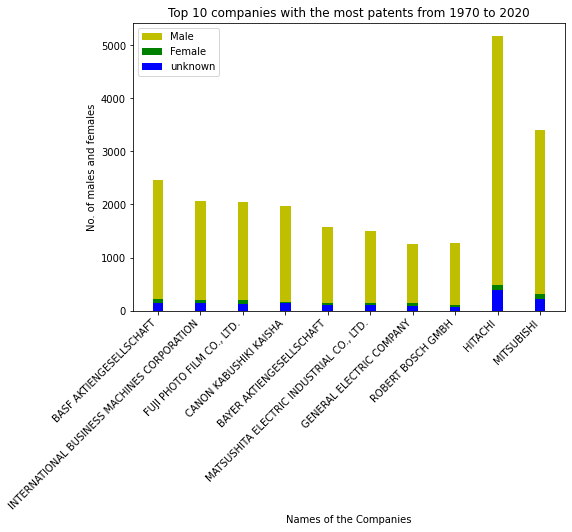

In [64]:
import matplotlib.pyplot as plt
male_values = [dict_common[key][0] for key in list(dict_common.keys())]
female_values = [dict_common[key][1] for key in list(dict_common.keys())]
unknown_values = [dict_common[key][2] for key in list(dict_common.keys())] 

fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
ax1=ax.bar(list(dict_common.keys()), male_values, color = 'y', width = 0.25)
ax2=ax.bar(list(dict_common.keys()), female_values, color = 'g', width = 0.25)
ax3=ax.bar(list(dict_common.keys()), unknown_values, color = 'b', width = 0.25)
plt.xticks(rotation=45,ha='right')
plt.title("Top 10 companies with the most patents from 1970 to 2020")
plt.xlabel("Names of the Companies")
plt.ylabel("No. of males and females")
plt.legend(["Male", "Female", "unknown"])

# for bar in ax1.patches:
#     height = bar.get_height()
#     width = bar.get_width()
#     x = bar.get_x()
#     y = bar.get_y()
#     label_text = height
#     label_x = x + width / 2
#     label_y = y + height / 2
#     ax.text(label_x, label_y, label_text, ha='center',va='center')
    
    
# for bar2 in ax2.patches:
#     height2 = bar2.get_height()
#     width2 = bar2.get_width()
#     x2 = bar2.get_x()
#     y2 = bar2.get_y()
#     label_text2 = height2
#     label_x2 = x2 + width2 / 2
#     label_y2 = y2 + height2 / 2
#     ax.text(label_x2, label_y2, label_text2, ha='center',va='center')
    
    
# for bar3 in ax3.patches:
#     height3 = bar3.get_height()
#     width3 = bar3.get_width()
#     x3 = bar3.get_x()
#     y3 = bar3.get_y()
#     label_text3 = height3
#     label_x3 = x3 + width3/2 
#     label_y3 = y3 + height3/2
#     ax.text(label_x3, label_y3, label_text3, ha='center',va='center')


plt.show()

# Gender distribution

In [65]:
print(male_values)
print(female_values)
print(unknown_values)

[2465, 2075, 2049, 1973, 1580, 1496, 1260, 1279, 5171, 3400]
[215, 202, 202, 155, 139, 149, 142, 102, 475, 314]
[135, 135, 133, 149, 98, 105, 95, 74, 390, 215]


In [66]:
##proportion of male, females and unknows in the top 10 companies
total_values = [(male_values[i] + female_values[i]+ unknown_values[i]) for i in range(len(male_values))]
total_values = np.array(total_values)

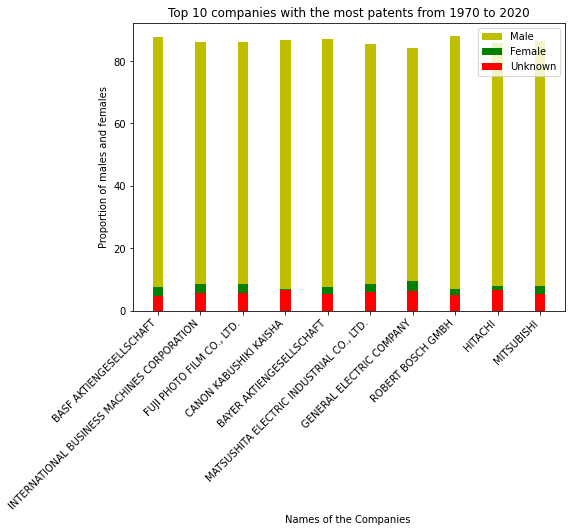

In [67]:
#gender distribution with top 10 compnies with most patents 

male_values_np = np.array(male_values)
female_values_np = np.array(female_values)
unknown_values_np = np.array(unknown_values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
graph1=ax.bar(list(dict_common.keys()), (male_values_np*100)/total_values, color = 'y', width = 0.25)
graph2= ax.bar(list(dict_common.keys()), (female_values_np*100)/total_values, color = 'g', width = 0.25)
graph3= ax.bar(list(dict_common.keys()), (unknown_values_np*100)/total_values, color = 'r', width = 0.25)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 companies with the most patents from 1970 to 2020")
plt.xlabel("Names of the Companies ")
plt.ylabel("Proportion of males and females")
plt.legend(["Male","Female","Unknown"])
plt.show()

In [68]:
unknown_values_np*100/total_values

array([4.79573712, 5.59701493, 5.57885906, 6.54369785, 5.39350578,
       6.        , 6.34602538, 5.08591065, 6.4612326 , 5.47213031])

In [69]:
male_values_np*100/total_values

array([87.56660746, 86.02819237, 85.94798658, 86.64909969, 86.95652174,
       85.48571429, 84.16833667, 87.90378007, 85.66931743, 86.53601425])

In [70]:
female_values_np*100/total_values

array([7.63765542, 8.3747927 , 8.47315436, 6.80720246, 7.64997248,
       8.51428571, 9.48563794, 7.01030928, 7.86944997, 7.99185543])

In [86]:
# w= df_final_.loc[df_final_['ee_name'] == 'MITSUBISHI']

In [87]:
# w= w.loc[df_final_['gender'] == 'nan'].count()
# w

application_number    0
gender                0
ee_name               0
rf_id                 0
exec_dt               0
count                 0
dtype: int64